In [1]:
#import libraries and dependencies
import pandas as pds
import numpy as npy
from sklearn.model_selection import train_test_split
import pickle

In [2]:
#import and read dataset of Dow jones.
dataFrame = pds.read_csv("C:\\Users\\Acer\\Desktop\\Closeing\\DJIA\\DJIA(ClosingVal-today).csv")

In [3]:
dataFrame.head()

,Date,Open,High,Low,Volume,Close
0,8/11/2008,11729.66992,11867.11035,11675.53027,183190000,11734.32031
1,8/12/2008,11781.70020,11782.34961,11601.51953,173590000,11782.34961
2,8/13/2008,11632.80957,11633.78027,11453.33984,182550000,11642.46973
3,8/14/2008,11532.07031,11718.28027,11450.88965,159790000,11532.95996
4,8/15/2008,11611.20996,11709.88965,11599.73047,215040000,11615.92969


In [4]:
dataFrame.tail()

,Date,Open,High,Low,Volume,Close
1983,6/27/2016,17355.21094,17355.21094,17063.08008,138740000,17400.75000
1984,6/28/2016,17190.50977,17409.72070,17190.50977,112190000,17140.24023
1985,6/29/2016,17456.01953,17704.50977,17456.01953,106380000,17409.72070
1986,6/30/2016,17712.75977,17930.60938,17711.80078,133030000,17694.67969
1987,7/1/2016,17924.24023,18002.38086,17916.91016,82160000,17929.99023


In [5]:
#checking for null values and the total no.of records.
dataFrame.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [6]:
dataFrame.shape

(1988, 6)

In [7]:
#remove date coloumn.
del dataFrame['Date']

In [8]:
#assign x as dataframe.
trainColoumn = dataFrame

In [9]:
# assign X and y to the train and test coloumns.
trainColoumn = npy.array(trainColoumn.drop(['Close'], 1))
testColoumn = npy.array(dataFrame['Close'])

In [10]:
#data spliting and defining.
x_training, x_testing, y_training, y_testing = train_test_split(trainColoumn, testColoumn, test_size=0.2, random_state=42)

In [11]:
#validating the split has correctly divided the dataset.
x_training.shape

(1590, 4)

In [12]:
y_training.shape

(1590,)

In [13]:
x_testing.shape

(398, 4)

In [14]:
y_testing.shape

(398,)

### LASSO

In [15]:
#import Lasso model
from sklearn.linear_model import Lasso

In [16]:
#fitting into the lasso model
lasso = Lasso(random_state=42,alpha=1.0,max_iter=1000, tol=0.0001)
lasso.fit(x_training, y_training)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
#predict target from training data
lasso_predictions = lasso.predict(x_testing)
# lasso_predictions

In [18]:
def mda(y_testing:npy.ndarray,predicted:npy.ndarray):
    """ Mean Directional Accuracy """
    return npy.mean((npy.sign(y_testing[1:]-y_testing[:-1])== npy.sign(predicted[1:]- predicted[:-1])).astype(int))

In [19]:
def MAPE(y_testing:npy.ndarray,predicted:npy.ndarray):
    """ Mean Absolute Percentage Error """
    mape = npy.mean(npy.abs((y_testing - predicted)/y_testing))*100
    return mape

In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, lasso_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, lasso_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, lasso_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, lasso_predictions))
print('Mean Absolute Percentage Error:', MAPE(y_testing,lasso_predictions))

e = MAPE(y_testing,lasso_predictions)
print('%.2f'%e)

Mean Absolute Error: 3.819203274737527
Mean Squared Error: 48.69402075437215
Root Mean Squared Error: 6.978110113373975
Mean Directional Accuracy: 1.0
Mean Absolute Percentage Error: 0.027141491081410743
0.03


### Predicting for 25th March

In [29]:
lasso.predict([[32346.81,32672.69,32071.41,411990000]])

array([32343.98628365])

### Graph

In [22]:
import matplotlib.pyplot as plt

In [23]:
newDataFrame=pds.read_csv("C:\\Users\\Acer\\Desktop\\Closeing\\DJIA\\DJIA(DataFrom25March)-Today.csv")

In [24]:
newDataFrame.head()

,Date,Open,High,Low,Volume,Close
0,3/25/2021,32346.81,32672.69,32071.41,411990000.0,32619.48
1,3/26/2021,32681.07,33098.83,32681.07,382170000.0,33072.88
2,3/29/2021,33087.55,33259.00,32905.13,351610000.0,33171.37
3,3/30/2021,33127.88,33170.93,32988.92,307510000.0,33066.96
4,3/31/2021,33116.04,33173.77,32980.57,414140000.0,32981.55


In [25]:
keep_columns=['Open','High','Low','Volume']
new_x_val=newDataFrame[keep_columns]

In [26]:
predictions = lasso.predict(new_x_val)

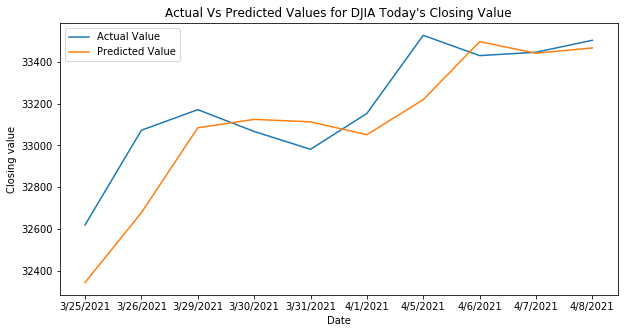

In [27]:
#defing the graph data
plt.figure(figsize=(10,5))
plt.plot(newDataFrame['Date'],newDataFrame['Close'], label ='Actual Value')
plt.plot(newDataFrame['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for DJIA Today's Closing Value")
plt.legend()

In [30]:
#dumping the most efficent model
pickle.dump(lasso, open("DWJA_tdysPrediction.pkl", 'wb'))
print('model saved...')

model saved...


# Random Forest

In [31]:
#import Roandom Forest model
from sklearn.ensemble import RandomForestRegressor

In [35]:
#fitting into the model
rfr = RandomForestRegressor(n_estimators=100, random_state=42,verbose=0)
rfr.fit(x_training, y_training)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
#predict target from training data
rfr_predictions = rfr.predict(x_testing)
rfr_predictions

array([15535.8568659 , 10744.3207528 , 15672.5822277 ,  8273.81896448,
       15301.69888   , 17761.3183816 , 17839.5584174 , 18101.3108205 ,
       12582.1723453 , 16274.1054699 ,  8818.12290046, 18011.3912132 ,
       12792.2839268 , 11471.078565  ,  7917.67344752, 15818.7432791 ,
       11436.3457715 , 13165.2611348 , 11868.2012994 , 10403.6252544 ,
       17656.2373245 ,  9277.05519546, 17826.8466805 , 17150.3165233 ,
       18035.6975405 , 11047.8069329 , 10374.6151483 , 16431.8837893 ,
       16288.858369  , 18117.6080071 , 16573.0451362 ,  8793.5258398 ,
       15966.9104093 ,  9089.38996116, 14833.6637715 , 12457.3115059 ,
       17423.7143336 ,  8692.07571268, 13479.7933204 , 17481.8330856 ,
       13241.0974514 , 14711.7449645 , 15183.2489565 , 17078.8655087 ,
       17113.1532232 , 11122.9823343 , 16440.6241193 , 16858.5679312 ,
       12414.4598434 , 13249.4221968 , 10191.9432521 , 17660.4166224 ,
       13578.1549022 , 11986.4077233 , 16805.7901155 ,  9972.49772461,
      

In [37]:
from sklearn import metrics

#Accuracy scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, rfr_predictions))
print('Mean r2 score:', metrics.r2_score(y_testing, rfr_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, rfr_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, rfr_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, rfr_predictions))
print ('Mean Absolute Percentage Error:', MAPE(y_testing,rfr_predictions))

Mean Absolute Error: 9.389957848843556
Mean r2 score: 0.9999780356837044
Mean Squared Error: 224.55609225354394
Root Mean Squared Error: 14.985195769610216
Mean Directional Accuracy: 1.0
Mean Absolute Percentage Error: 0.07661804434002491


In [48]:
lasso.predict([[33526.19,33810.87,33526.19,316410000]])

array([33523.08966862])

In [49]:
rfr.predict([[33526.19,33810.87,33526.19,316410000]])

array([18297.9576384])

# XGBoost

In [50]:
#import xgBoost model
from xgboost import XGBRegressor

In [51]:
#fitting into the model
xgb = XGBRegressor()
xgb.fit(x_training,y_training)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [52]:
#predict target from training data
xgb_predictions = xgb.predict(x_testing)
xgb_predictions

array([15521.184 , 10690.068 , 15658.964 ,  8284.386 , 15295.112 ,
       17760.24  , 17840.984 , 18081.078 , 12588.22  , 16273.177 ,
        8836.142 , 18015.25  , 12785.94  , 11479.235 ,  7937.702 ,
       15824.523 , 11426.723 , 13159.796 , 11864.278 , 10404.159 ,
       17676.783 ,  9268.75  , 17851.062 , 17150.852 , 18034.361 ,
       11027.116 , 10365.587 , 16451.57  , 16301.943 , 18132.404 ,
       16622.309 ,  8838.74  , 15958.331 ,  9027.5625, 14838.644 ,
       12452.189 , 17410.623 ,  8644.356 , 13478.448 , 17451.871 ,
       13240.544 , 14682.937 , 15186.042 , 17075.738 , 17110.445 ,
       11138.531 , 16437.465 , 16749.969 , 12413.91  , 13250.516 ,
       10176.436 , 17651.428 , 13622.04  , 11973.95  , 16771.553 ,
        9979.043 , 17827.66  , 11396.133 , 16627.764 , 13547.62  ,
       16925.65  , 15484.289 , 17213.693 , 17724.727 , 17774.273 ,
        8740.13  , 16015.63  , 17065.197 , 12378.361 , 12921.773 ,
       17748.54  , 14807.585 , 10178.801 , 10368.127 ,  8485.5

In [53]:
#Accuracy scores

print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, xgb_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, xgb_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, xgb_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, xgb_predictions))
print('Mean r2 score:', metrics.r2_score(y_testing, xgb_predictions))

Mean Absolute Error: 14.336502927214159
Mean Squared Error: 426.2423953498836
Root Mean Squared Error: 20.645638652022456
Mean Directional Accuracy: 1.0
Mean r2 score: 0.9999583083108718


# SVM

In [54]:
#import Roandom Forest model
from sklearn.svm import SVR

In [55]:
#fitting into the model
svr = SVR()
svr.fit(x_training,y_training)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
#predict target from training data
svr_predictions = svm.predict(x_testing)
svr_predictions

array([12947.9667579 , 12650.51332011, 12928.55357755, 12624.96333098,
       12993.46567234, 13082.5862631 , 13113.93205532, 13097.89501299,
       12963.35090306, 12974.33437501, 12636.33796724, 13097.3150585 ,
       12982.78799331, 12888.64229896, 12601.9637923 , 13084.85100016,
       12932.47350249, 13054.75028686, 12819.2290765 , 12879.60898392,
       13034.04558782, 12781.29668821, 13035.41035946, 13056.53841939,
       13148.83237773, 12786.48905921, 12739.97106341, 12976.46632202,
       13149.62531   , 12634.80138333, 13126.89245438, 12688.0755005 ,
       13107.01996001, 12597.73024355, 12977.52964647, 12876.63225805,
       13067.86819635, 12696.21319224, 13027.01815139, 13059.72607957,
       13001.92809939, 13094.64788708, 13071.0687024 , 13125.64946838,
       13145.18393707, 12758.02778936, 13106.5617302 , 13072.04579955,
       12936.38220804, 12649.93491096, 12629.3169856 , 13102.23965875,
       13035.27415976, 12952.66166634, 13036.68755567, 12619.55668701,
      

In [57]:
#Accuracy scores

print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, svm_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, svm_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, svm_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, svm_predictions))
print('Mean r2 score:', metrics.r2_score(y_testing, svm_predictions))

Mean Absolute Error: 2725.0284213971186
Mean Squared Error: 9799968.602648532
Root Mean Squared Error: 3130.490153737675
Mean Directional Accuracy: 0.8261964735516373
Mean r2 score: 0.04144390866678449
